In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-22 20:35:07.833038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 20:35:07.833079: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import and subset data

<Item title:"SAC_CTS_CRLF_Aquatic_Habitat_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
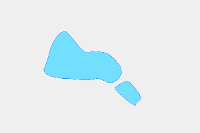

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('518a1890f3ec425691136725c7be42ee')

ponds = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = ponds.merge(observations, left_on='GlobalID', right_on='Ref_to_Ponds', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Ponds'])
data = data.rename(columns={'OBJECTID_x':'Pond_ObjectID','GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ObjectID'})
data.head()

,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Survey_Type,Survey_Timing,Survey_Method,Cloud_Cover,Air_Temperature,Wind_Speed,Precipitation,Water_Temp_Surface,Water_Temp_Bottom,Weather_Comments,Pond_Depth,Number_of_Dips,Number_of_Seine,Emergent_Veg_Cover,Floating_Veg_Cover,Submerged_Veg_Cover,Species_Com,Life_Stage,Num_Bullfrogs_Euth,Comments,Snout_Vent_Length,Record_GlobalID,Species_Sci,Observed_Heard,Indvids,Total_Length,Pond_Visibility_Conditions,Num_of_Individuals
0,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",70,2018-03-31 08:11:00,MasonHolmes,MarinaOlson,None,Visual,Day,None,75,79,0,0,0,0,None,0,0,0,60,0,0,Pacific tree frog,Egg Mass,0.0,Five different egg masses observed.,0.0,54e7fdda-953b-457e-8b98-66df4fe097d0,Pseudacris sierra,Observed,0,0.0,None,5
1,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",71,2018-03-31 08:11:00,MasonHolmes,MarinaOlson,None,Visual,Day,None,75,79,0,0,0,0,None,0,0,0,60,0,0,California tiger salamander,Egg,0.0,15 individual eggs observed on Elecharis sp. c...,0.0,67c69928-7cc3-42d8-b2a5-bbe0c4850eb2,Ambystoma californiense,Observed,0,0.0,None,15
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",72,2018-03-31 08:11:00,MasonHolmes,MarinaOlson,None,Visual,Day,None,75,79,0,0,0,0,None,0,0,0,60,0,0,Pacific tree frog,Adult - 2 or more years old or sexually mature,0.0,Green and brown morphs of treefrogs observed.,0.0,8cd0bcc0-6760-430e-8f09-e357caa951f4,Pseudacris sierra,Observed,0,0.0,None,6
3,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",73,2018-03-31 12:23:00,MasonHolmes,MarinaOlson,None,Aural,Night,None,75,63,2,0,0,0,None,0,0,0,60,0,0,Pacific tree frog,Unknown,0.0,"Heard chorus of Pacific Treefrogs, number and ...",0.0,9517e789-bead-4e46-86cc-4b98545505da,Pseudacris sierra,Heard,0,0.0,None,1
4,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",74,2018-03-31 12:23:00,MasonHolmes,MarinaOlson,None,Aural,Night,None,75,63,2,0,0,0,None,0,0,0,60,0,0,California toad,Adult - 2 or more years old or sexually mature,0.0,One individual observed.,0.0,79104302-6ecb-4108-b016-f6ac8150b4cf,Anaxyrus boreas halophilus,Observed,0,0.0,None,1


In [4]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 24


# QAQC

In [5]:
QAQC_whitespace(data, exclude_cols=['Additional_Surveyors','Weather_Comments','Comments'], objectID=['Record_ObjectID'])



Analysis for: Life_Stage
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Survey_Method
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Com
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observed_Heard
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces foun

In [6]:
#find blank entries
find_blank_entries(data, exclude_cols=['Additional_Surveyors','Survey_Method','Weather_Comments','Comments',
                                      'Pond_Visibility_Conditions'])

No blank Floating_Veg_Cover
No blank Total_Length
No blank Number_of_Dips
No blank SHAPE
No blank Observation_Date
No blank Observed_Heard
No blank Water_Temp_Bottom
No blank Submerged_Veg_Cover
No blank Surveyor_1
No blank Record_ObjectID
No blank Air_Temperature
No blank Shape__Length
No blank Life_Stage
No blank Species_Com
No blank Num_of_Individuals
No blank Indvids
No blank Water_Temp_Surface
No blank Cloud_Cover
No blank Wind_Speed
No blank Shape__Area
No blank Emergent_Veg_Cover
No blank Snout_Vent_Length
No blank Surveyor_2
No blank Record_GlobalID
No blank BHR_Site
No blank Precipitation
No blank Species_Sci
No blank Pond
No blank Pond_ObjectID
No blank Number_of_Seine
No blank Survey_Type
Blank Num_Bullfrogs_Euth entrie(s) exist!


,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Survey_Type,Survey_Timing,Survey_Method,Cloud_Cover,Air_Temperature,Wind_Speed,Precipitation,Water_Temp_Surface,Water_Temp_Bottom,Weather_Comments,Pond_Depth,Number_of_Dips,Number_of_Seine,Emergent_Veg_Cover,Floating_Veg_Cover,Submerged_Veg_Cover,Species_Com,Life_Stage,Num_Bullfrogs_Euth,Comments,Snout_Vent_Length,Record_GlobalID,Species_Sci,Observed_Heard,Indvids,Total_Length,Pond_Visibility_Conditions,Num_of_Individuals
39,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",111,2021-03-27 05:03:08,Other,Kurt Lutz,Surveyor 1 Mason Holmes.,Visual,Night,Other (see comments),0,54,0,0,0,0,,0,0,0,5,2,2,Pacific tree frog,Adult - 2 or more years old or sexually mature,NaN,Pond dry.,0.0,a7748620-6085-4d2c-92f3-37af06bb7e8c,Pseudacris sierra,Observed,1,0.0,,0
75,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",109,2021-03-27 03:15:06,Other,Kurt Lutz,Surveyor 1 Mason Holmes.,Visual,Night,Other (see comments),0,57,0,0,0,0,,0,0,0,2,2,2,Pacific tree frog,Adult - 2 or more years old or sexually mature,NaN,,0.0,f2786570-dd07-41ba-a031-20f3c1e9ab85,Pseudacris sierra,Both,2,1.0,,2
76,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",110,2021-03-27 03:15:06,Other,Kurt Lutz,Surveyor 1 Mason Holmes.,Visual,Night,Other (see comments),0,57,0,0,0,0,,0,0,0,2,2,2,California newt,Adult - 2 or more years old or sexually mature,NaN,,0.0,61febeb2-b2bc-4f07-bc22-1c07fb7b13d2,Taricha torosa,Both,1,0.0,,1
77,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",118,2021-04-23 18:12:27,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",Visual,Day,Dipnet,5,58,10,0,0,0,,0,90,0,1,0,90,Pacific tree frog,Tadpole Frog - No arms or legs but gills and tail present,NaN,,0.0,a575196d-e506-4632-a9f9-4ce59fbd45c4,Pseudacris sierra,Observed,4,0.0,,0
79,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",120,2021-04-23 18:12:27,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",Visual,Day,Dipnet,5,58,10,0,0,0,,0,90,0,1,0,90,California newt,Larva Newt/Salamander - Tail only to having arms and legs with ext...,NaN,,0.0,9e3d8aee-92af-47bc-8f51-b3f7db52469f,Taricha torosa,Observed,1,0.0,,0
80,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",121,2021-04-23 18:12:27,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",Visual,Day,Seine,5,58,10,0,0,0,,0,0,8,1,0,90,Pacific tree frog,Adult - 2 or more years old or sexually mature,NaN,,0.0,5987dcc6-fcf9-4d14-8617-e24ae8cfff86,Pseudacris sierra,Observed,1,0.0,,0
81,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",122,2021-04-23 18:12:27,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",Visual,Day,Seine,5,58,10,0,0,0,,0,0,8,1,0,90,Pacific tree frog,Tadpole Frog - No arms or legs but gills and tail present,NaN,,0.0,9b1b950b-9990-45c0-825c-910a9e2fafe7,Pseudacris sierra,Observed,13,0.0,,0
82,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",123,2021-04-23 18:12:27,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",Visual,Day,Seine,5,58,10,0,0,0,,0,0,8,1,0,90,California newt,Larva Newt/Salamander - Tail only to having arms and legs with ext...,NaN,,0.0,c295d1f3-222d-4446-a847-178bcd4d77b5,Taricha torosa,Observed,3,0.0,,0
84,2,Lower Courthouse Pond,SAC,50722.36

No blank Pond_Depth
No blank Survey_Timing


In [7]:
data.columns

Index(['Pond_ObjectID', 'Pond', 'BHR_Site', 'Shape__Area', 'Shape__Length',
       'SHAPE', 'Record_ObjectID', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Additional_Surveyors', 'Survey_Type', 'Survey_Timing',
       'Survey_Method', 'Cloud_Cover', 'Air_Temperature', 'Wind_Speed',
       'Precipitation', 'Water_Temp_Surface', 'Water_Temp_Bottom',
       'Weather_Comments', 'Pond_Depth', 'Number_of_Dips', 'Number_of_Seine',
       'Emergent_Veg_Cover', 'Floating_Veg_Cover', 'Submerged_Veg_Cover',
       'Species_Com', 'Life_Stage', 'Num_Bullfrogs_Euth', 'Comments',
       'Snout_Vent_Length', 'Record_GlobalID', 'Species_Sci', 'Observed_Heard',
       'Indvids', 'Total_Length', 'Pond_Visibility_Conditions',
       'Num_of_Individuals'],
      dtype='object')

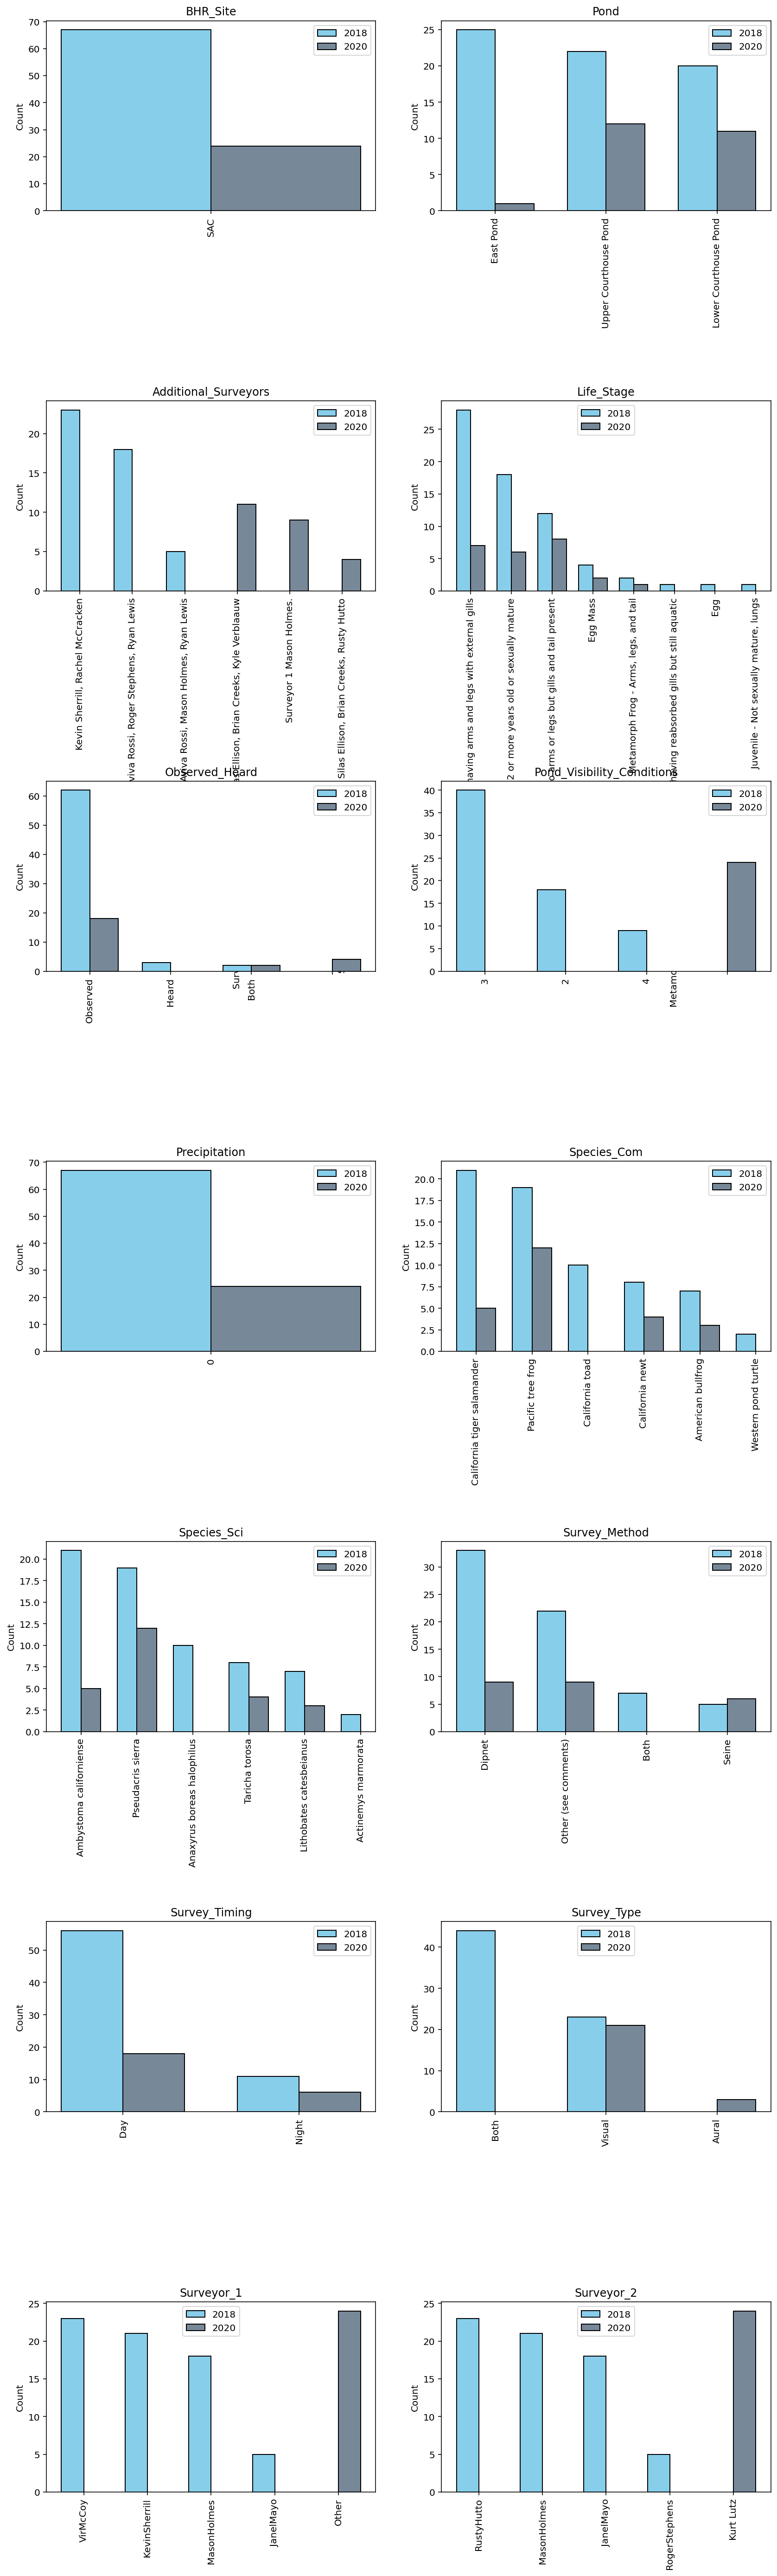

In [8]:
#compare data from previous years
compare_years_catagorical(data, ['BHR_Site', 'Pond', 
       'Additional_Surveyors',
       'Life_Stage',
       'Observed_Heard', 'Pond_Visibility_Conditions',
       'Precipitation', 'Species_Com', 'Species_Sci',
       'Survey_Method', 'Survey_Timing', 'Survey_Type',
       'Surveyor_1', 'Surveyor_2'], '2018','2020')

# Export Data Deliverable

In [9]:
field_order = ['BHR_Site', 
 'Observation_Date',
 'Surveyor_1', 
 'Surveyor_2',
  'Additional_Surveyors',
 'Pond', 
 'Survey_Type',
 'Survey_Timing',
 'Survey_Method', 
 'Cloud_Cover', 
 'Air_Temperature',
 'Wind_Speed',
 'Precipitation',
 'Water_Temp_Surface',
 'Water_Temp_Bottom',
 'Pond_Visibility_Conditions',
 'Weather_Comments',
 'Pond_Depth', 
 'Emergent_Veg_Cover',
 'Floating_Veg_Cover',
 'Submerged_Veg_Cover',
 'Number_of_Dips',
 'Number_of_Seine', 
  'Species_Sci',
 'Species_Com',
 'Observed_Heard',
 'Life_Stage',
 'Snout_Vent_Length', 
 'Num_Bullfrogs_Euth',
  'Total_Length',
 'Indvids',
 'Num_of_Individuals',
 'Comments',
 'Pond_ObjectID',
 'Record_ObjectID',
 'Record_GlobalID', 
 'SHAPE', 
 'Shape__Area', 
 'Shape__Length' ]

In [10]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_CTS_CRLF_Aquatic_Habitat_Monitoring')

Exported to Outputs/SAC_CTS_CRLF_Aquatic_Habitat_Monitoring_Data_20211222.xlsx
